In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import random
import time
import CompMethods_V3 as TP
import DataSetting_v5 as DS

In [2]:
gpu = 1
date = '20240909'
name = f'{date}_Leave_1_Env_COMP'
data_path = ['../dataset/Door_EXP/A208',
             '../dataset/Door_EXP/A308',
             '../dataset/Door_EXP/B211',
             '../dataset/Door_EXP/C605']
level = 'env'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()
torch.cuda.set_device(gpu)

Cross validation plan at env level
Loading ../dataset/Door_EXP/A208...

Loaded 0709A23-csi.npy of shape (111248, 30, 3)
Loaded 0709A41-csi.npy of shape (248817, 30, 3)
Loaded 0709A24-csi.npy of shape (38347, 30, 3)
Loaded 0709A20-csi.npy of shape (209993, 30, 3)
Loaded 0709A14-csi.npy of shape (168611, 30, 3)
Loaded 0709A12-csi.npy of shape (151822, 30, 3)
Loaded 0709A02-csi.npy of shape (232687, 30, 3)
Loaded 0709A11-csi.npy of shape (219643, 30, 3)
Loaded 0709A50-csi.npy of shape (133412, 30, 3)
Loaded 0709A511-csi.npy of shape (62914, 30, 3)
Loaded 20240709_153519-rimg.npy of shape (4057, 128, 226)
Loaded 20240709_154950-rimg.npy of shape (6302, 128, 226)
Loaded 20240709_161802-rimg.npy of shape (3442, 128, 226)
Loaded 20240709_185105-rimg.npy of shape (6481, 128, 226)
Loaded 20240709_192745-rimg.npy of shape (7787, 128, 226)
Loaded 20240709_193501-rimg.npy of shape (3267, 128, 226)
Loaded 20240709_191754-rimg.npy of shape (5395, 128, 226)
Loaded 20240709_163045-rimg.npy of shape (6

In [3]:
import gc

def empty_cache(model):
    del model
    torch.cuda.empty_cache()
    gc.collect()
    
torch.cuda.set_device(gpu)
preprocess = DS.Preprocess(new_size=(128, 128))
preprocess_wi2vi = DS.Preprocess(new_size=(240, 320))

## Env

In [4]:
data_organizer.gen_plan(subset_ratio=0.2, save=True)
train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s')
t_train_loader, t_valid_loader, t_test_loader, current_test = data_organizer.gen_loaders(mode='t')

Saving plan env...
Fetched level env, 1 of 4, current = A308
Train set range = {'A208', 'B211', 'C605'}, len = 30670 from 153354
Test set current = A308, len = 10014 from 50074
Fetched level env, 2 of 4, current = A208
Train set range = {'A308', 'B211', 'C605'}, len = 29089 from 145445
Test set current = A208, len = 11596 from 57983
Fetched level env, 3 of 4, current = B211
Train set range = {'A308', 'A208', 'C605'}, len = 30729 from 153648
Test set current = B211, len = 9956 from 49780
Fetched level env, 4 of 4, current = C605
Train set range = {'A308', 'A208', 'B211'}, len = 31567 from 157837
Test set current = C605, len = 9118 from 45591
Plan saved!

Fetched level env, 1 of 4, current = A308
Train set range = {'A208', 'B211', 'C605'}, len = 30670 from 153354
Test set current = A308, len = 10014 from 50074
Generating loaders for s...
Train dataset length = 30603
Test dataset length = 10014
 exported train loader of len 382, batch size = 64
 exported valid loader of len 95, batch size

### AE

==========20240909_Leave_1_Env_COMP_A308_AE AE Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:05<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:04<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 300...

Total training time: 54141.01628303528 sec


<Figure size 432x288 with 0 Axes>

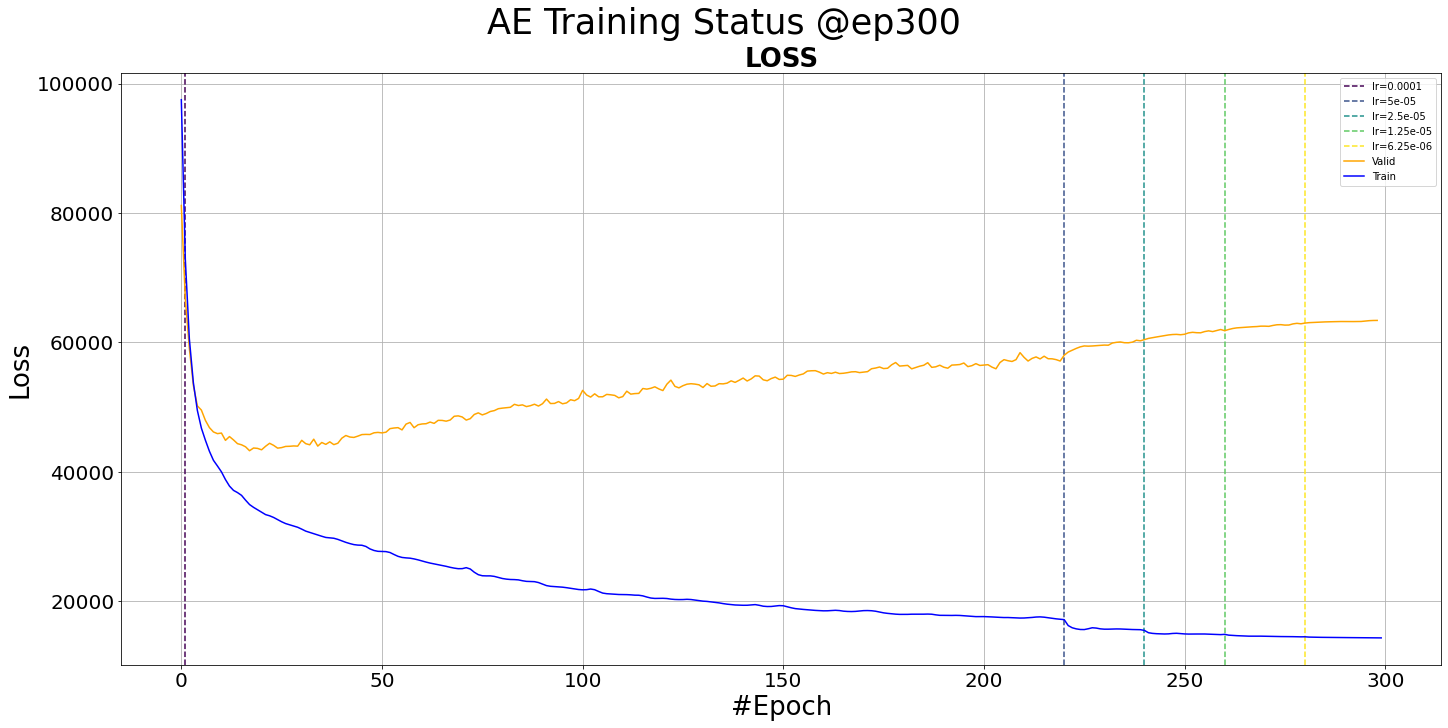

==========20240909_Leave_1_Env_COMP_A308_AE AE Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 227.4029509626446}

Total training time: 163.96754550933838 sec


<Figure size 1440x720 with 0 Axes>

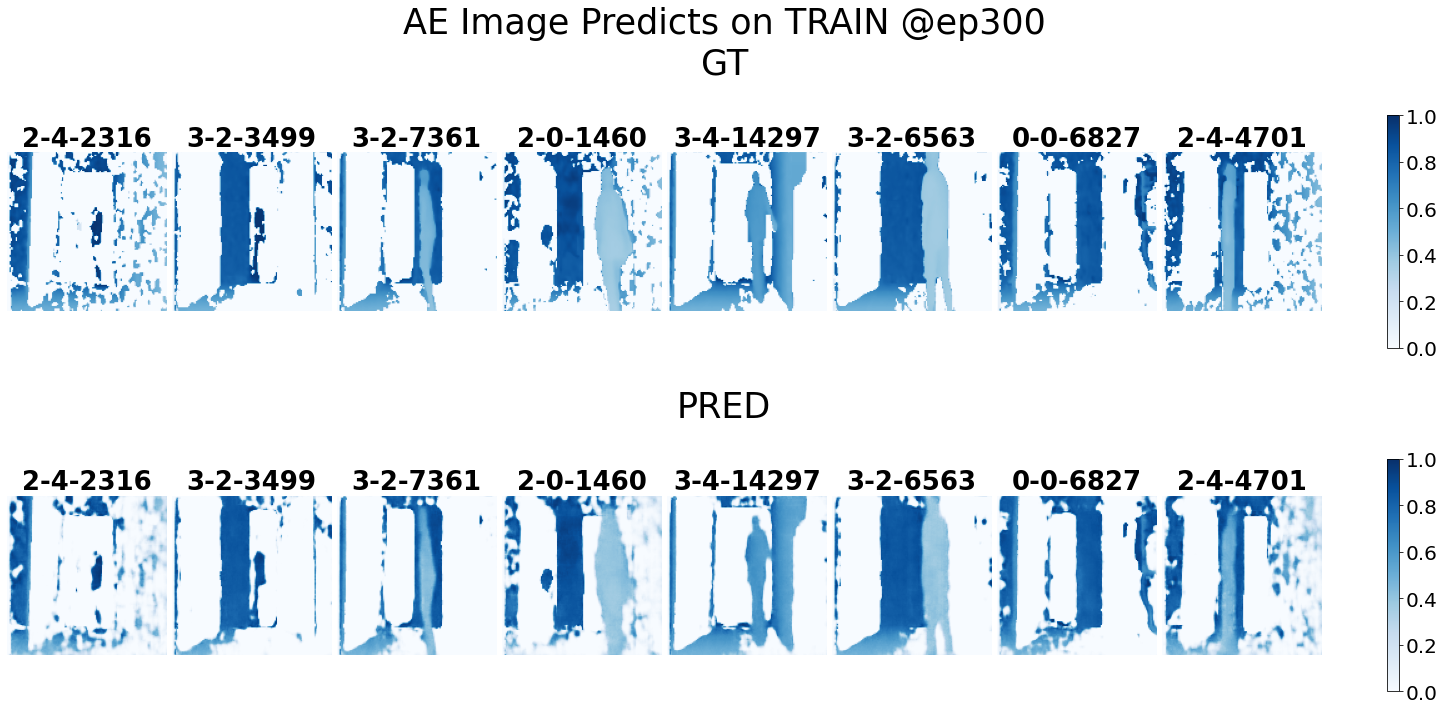

<Figure size 1440x720 with 0 Axes>

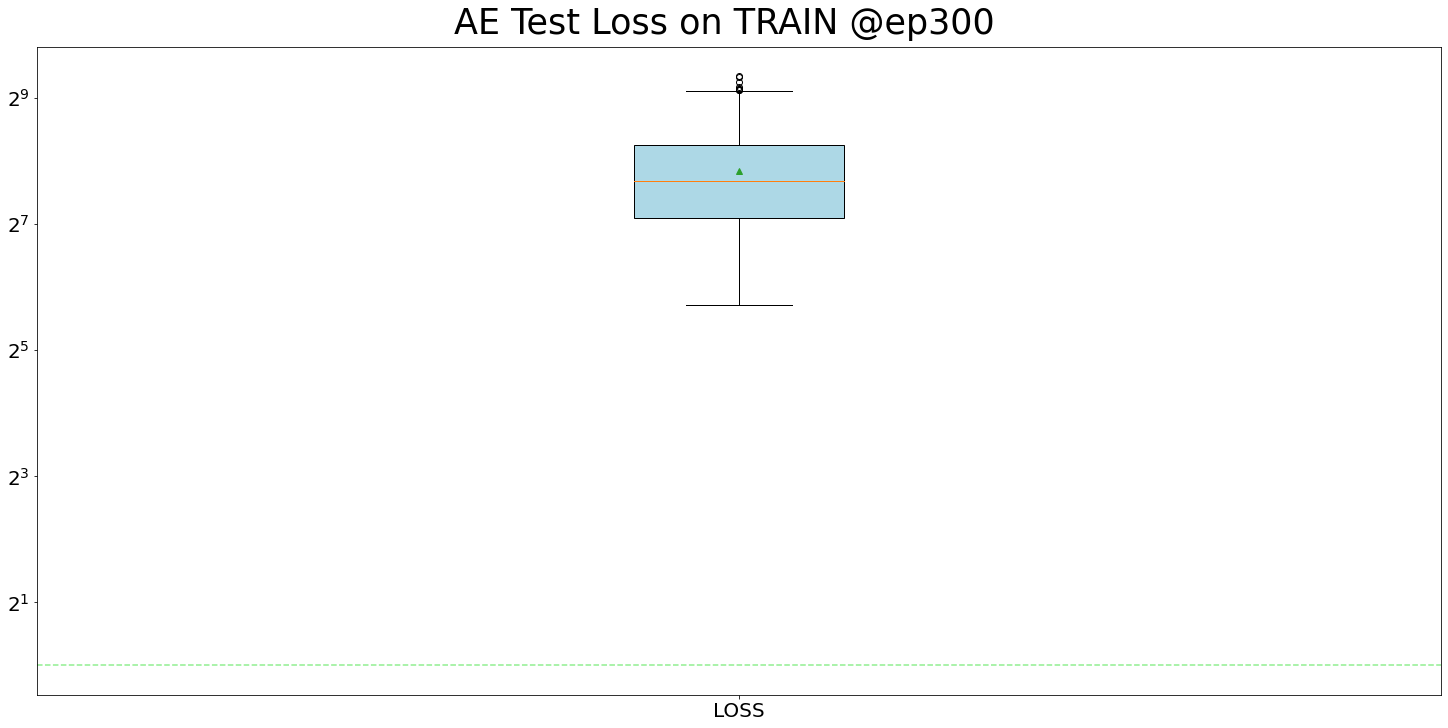

<Figure size 1440x720 with 0 Axes>

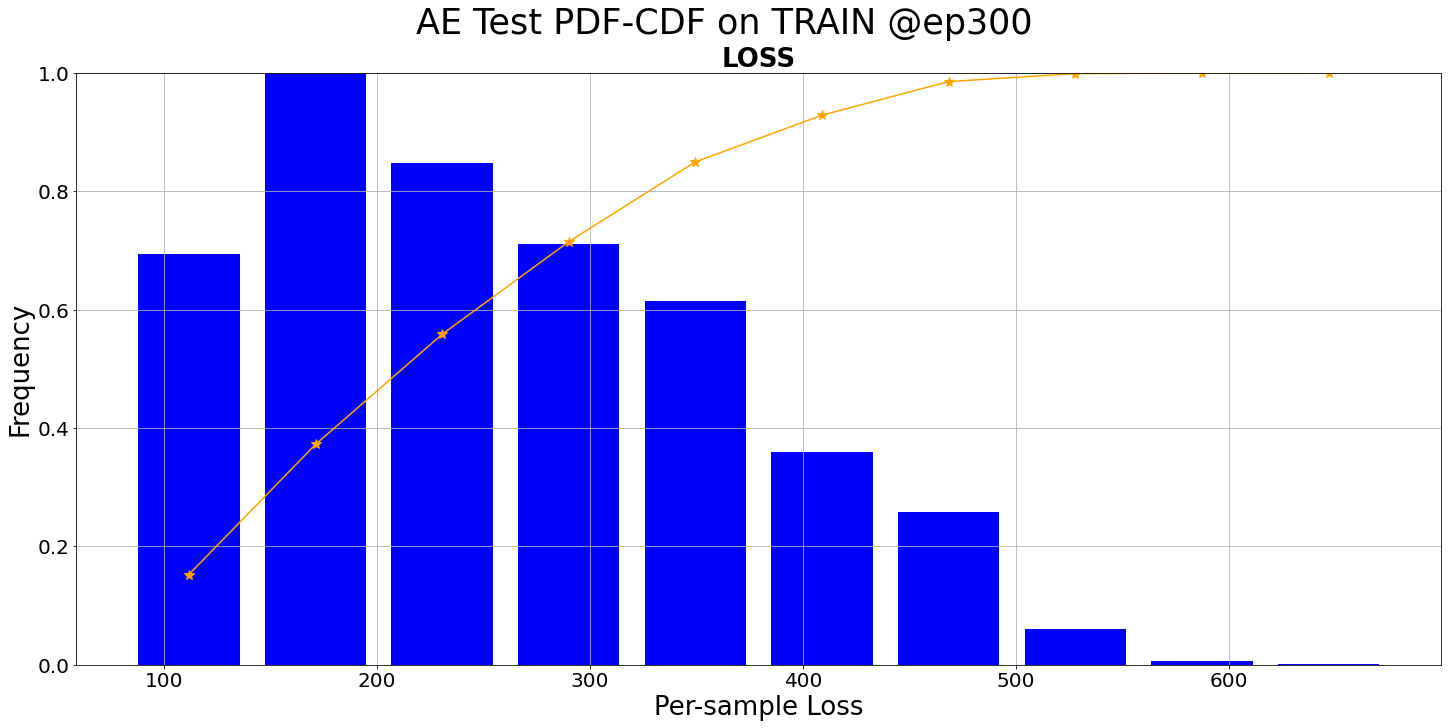

<Figure size 1440x720 with 0 Axes>

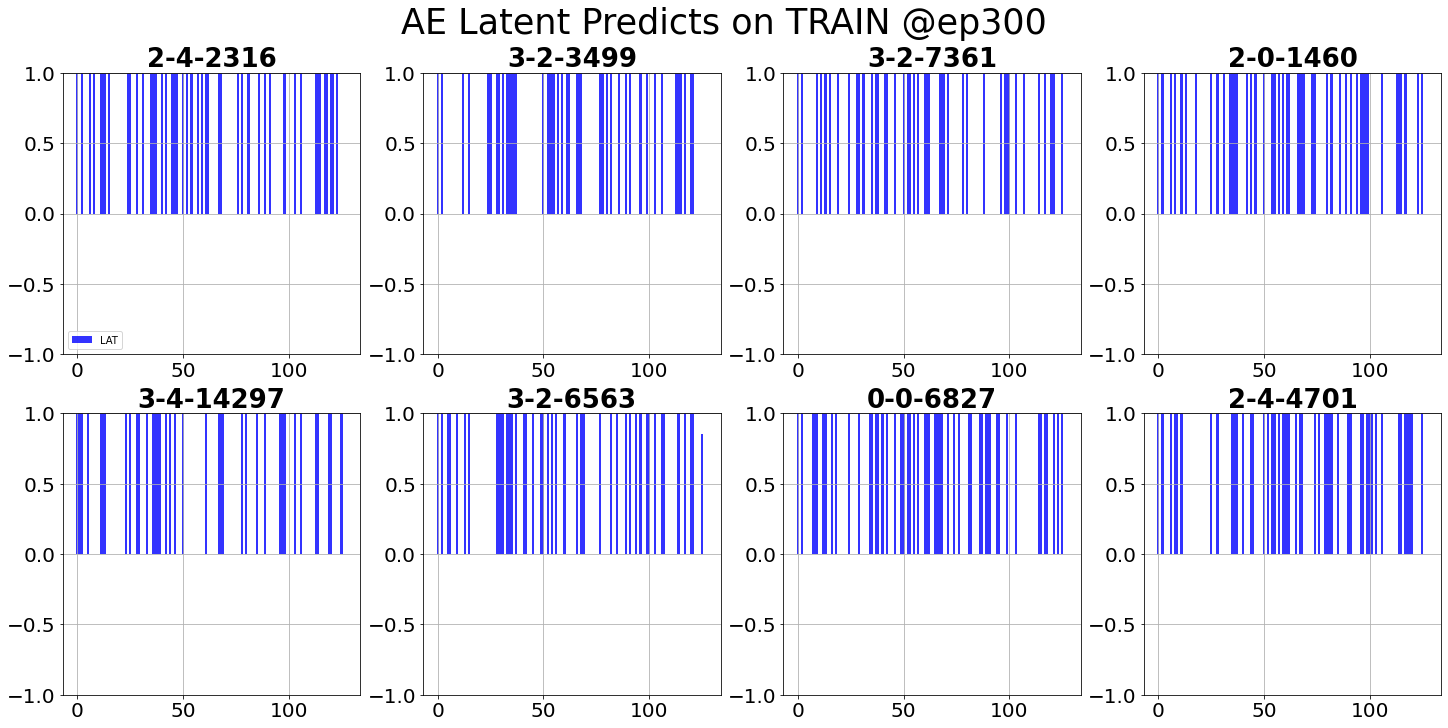

==========20240909_Leave_1_Env_COMP_A308_AE AE Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 3205.1663810801597}

Total training time: 122.36260175704956 sec


<Figure size 1440x720 with 0 Axes>

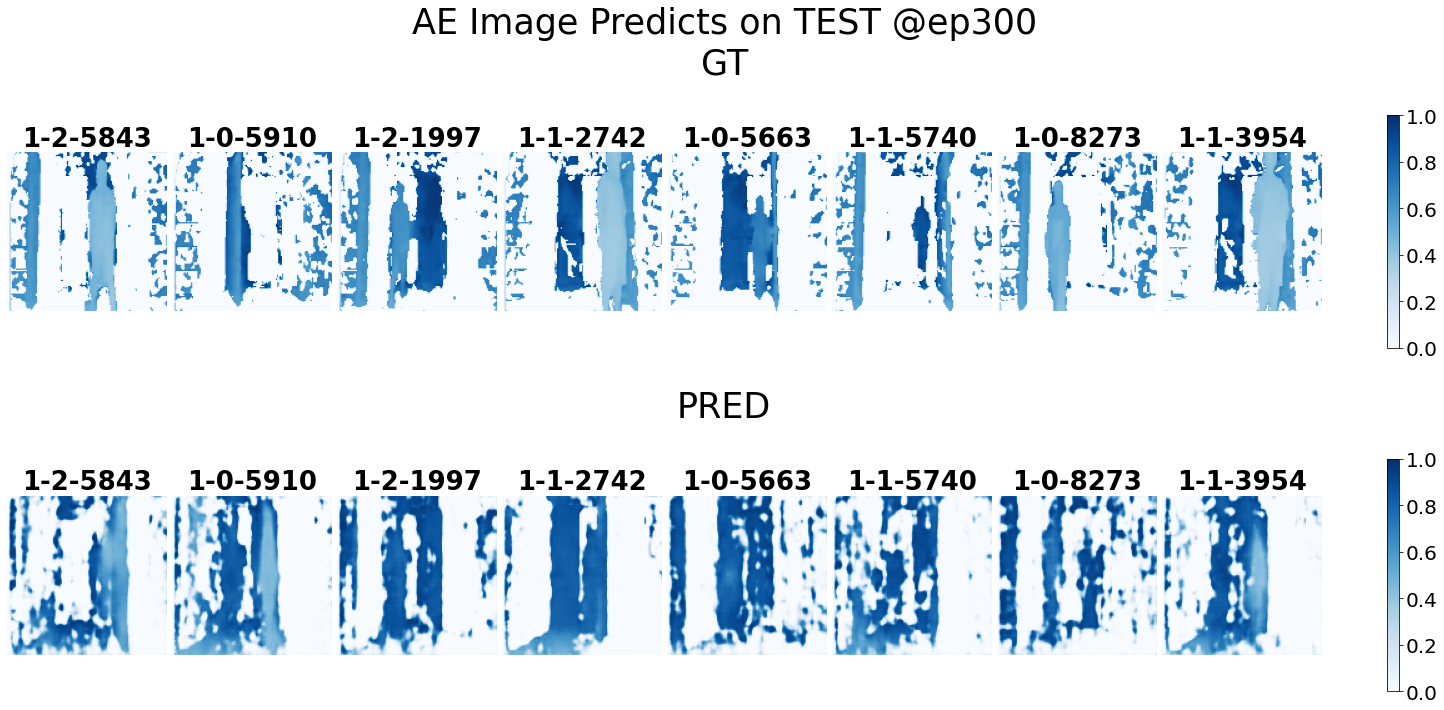

<Figure size 1440x720 with 0 Axes>

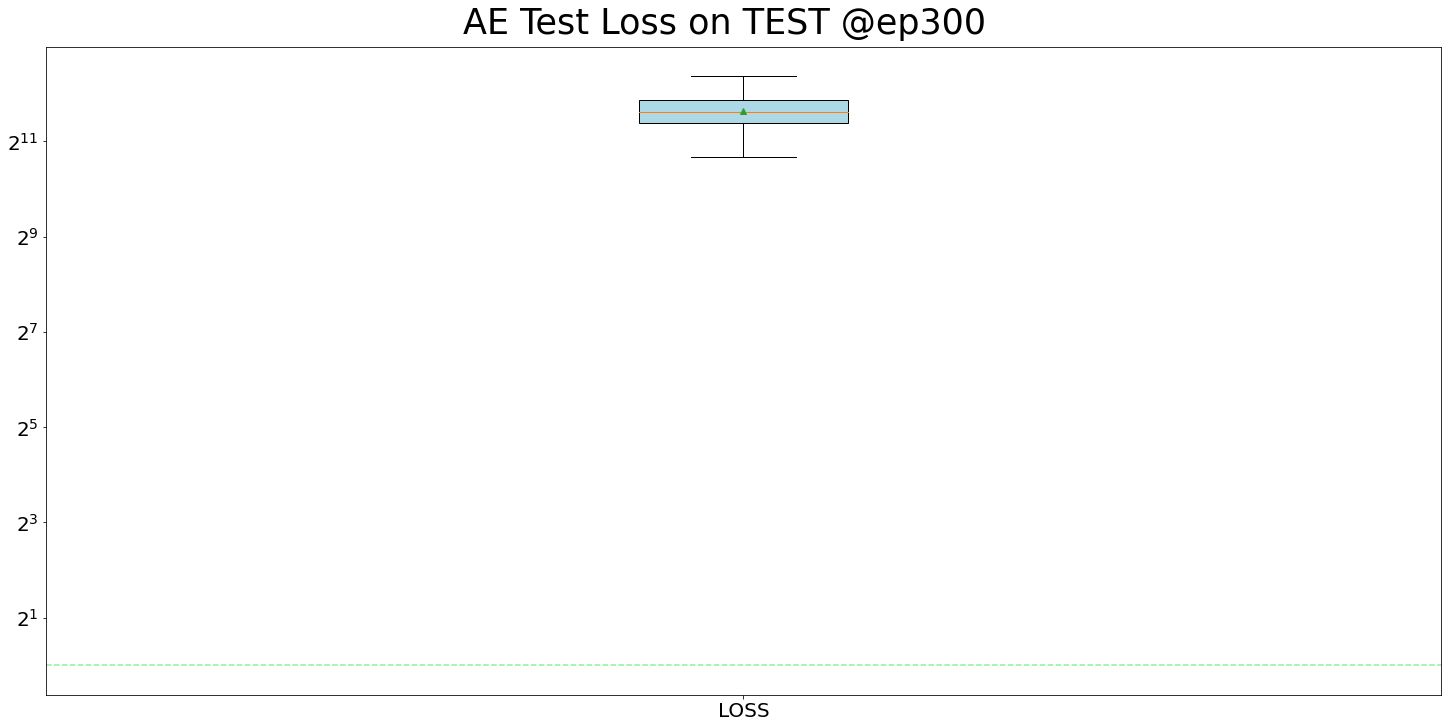

<Figure size 1440x720 with 0 Axes>

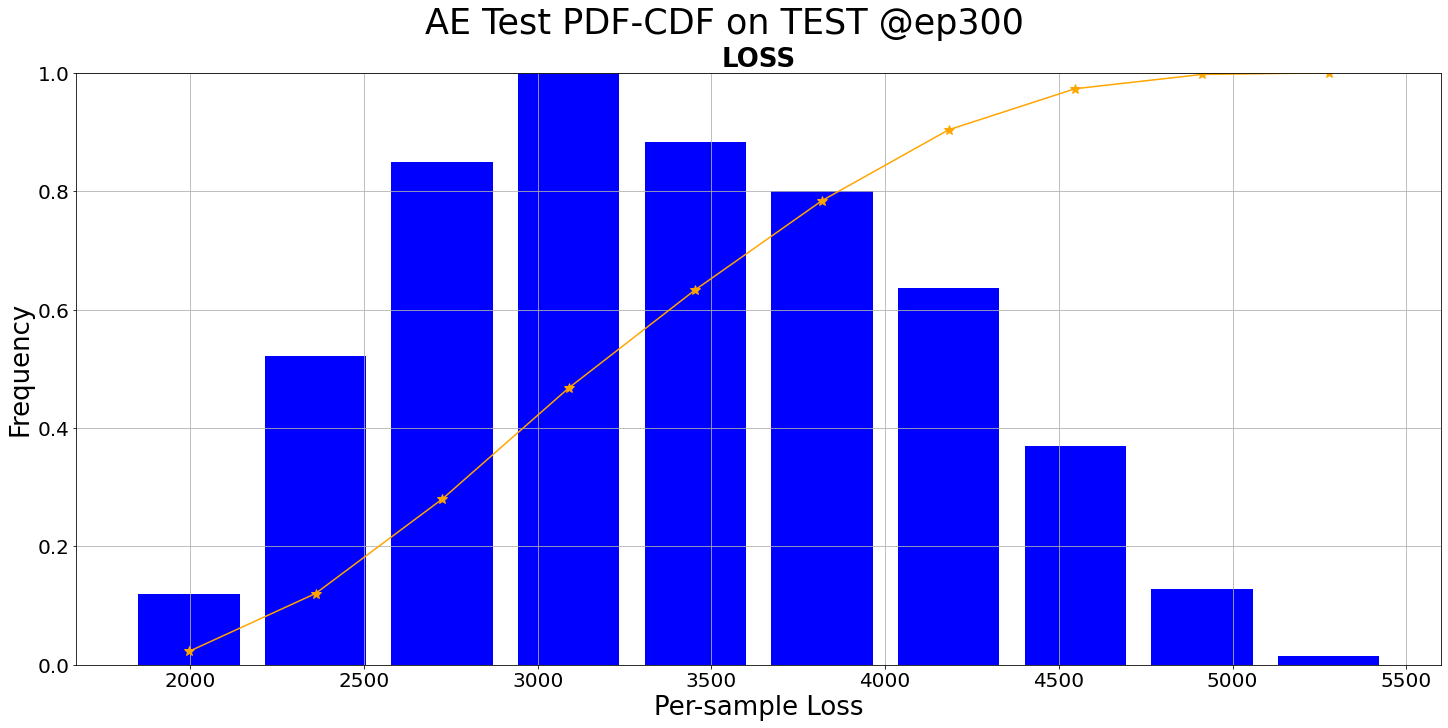

<Figure size 1440x720 with 0 Axes>

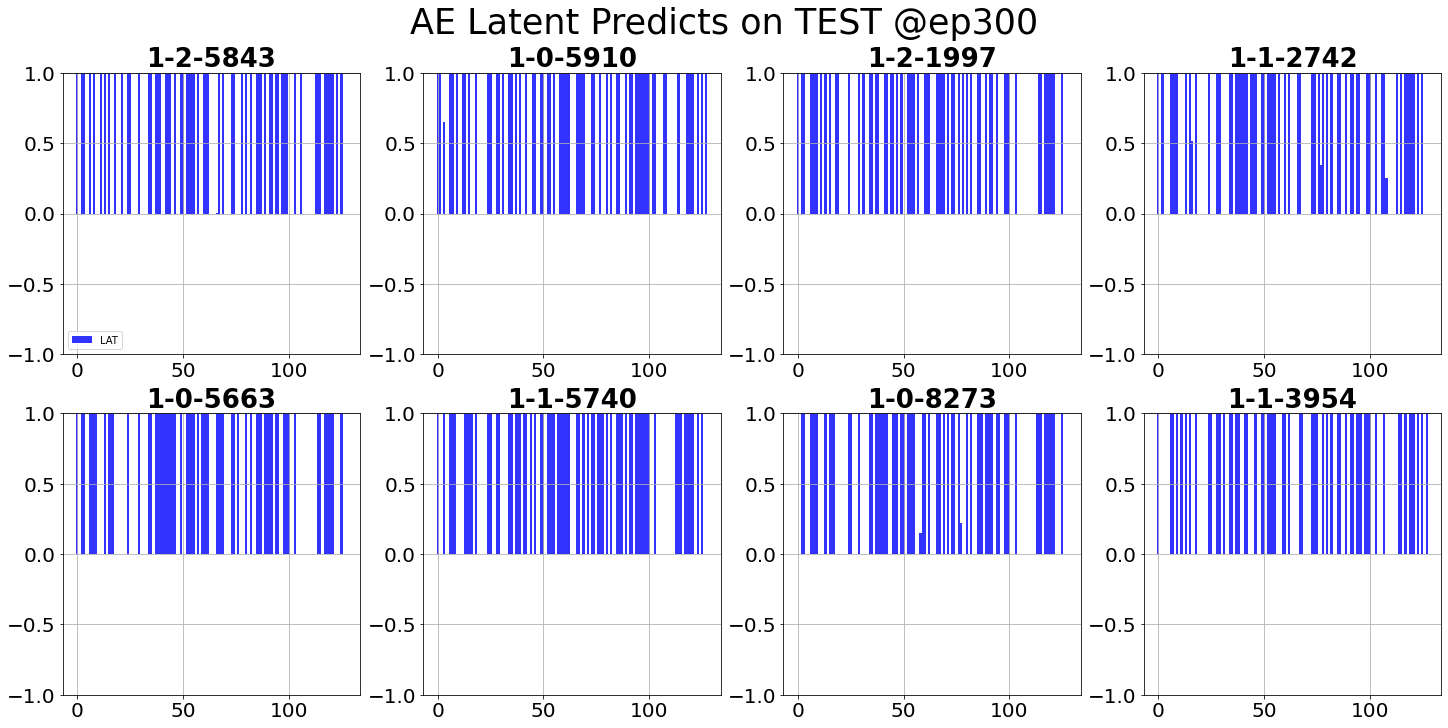

Saving preds: PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

AE schedule Completed!


In [5]:
AE_trainer = TP.CompTrainer(name='AE', mode='ae', mask=False,
                                networks=[TP.AutoEncoder(latent_dim=128, middle_dim=512*7*75)],
                                lr=1e-4, epochs=10, cuda=gpu,
                                preprocess = preprocess,
                                loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                notion=f"{name}_{current_test}_AE",
                                train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader)
ae_trained = AE_trainer.schedule(lr_decay=True)

In [ ]:
for data in train_loader:
    print(data['csi'].shape)
    break

### VAE

In [ ]:
VAE_trainer = TP.CompTrainer(name='VAE', mode='vae', mask=False,
                             networks=[TP.AutoEncoder(latent_dim=128, middle_dim=512*7*75, mode='vae')],
                             lr=1e-4, epochs=10, cuda=gpu,
                             preprocess = preprocess,
                             loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                             notion=f"{name}_{current_test}_VAE",
                             train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader)
vae_trained = VAE_trainer.schedule(early_stop=True, lr_decay=True)

==========20240909_Leave_1_Env_COMP_A308_VAE VAE Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

In [ ]:
empty_cache(VAE_trainer.model['vae'])

### Teacher-Student AE

In [ ]:
T_trainer = TP.CompTrainer(name='AETeacher', mode='ae_t', mask=False,
                           networks=[TP.ImageEncoder(latent_dim=128), 
                                     TP.ImageDecoder(latent_dim=128)],
                           lr=1e-4, epochs=10, cuda=gpu,
                           preprocess = preprocess,
                           loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                           train_loader=t_train_loader, valid_loader=t_valid_loader, test_loader=t_test_loader, 
                           notion=f'{name}_{current_test}_TSAE')
tsae_t_trained = TSAE_T_trainer.schedule()

In [ ]:
TSAE_S_trainer = TP.CompStudentTrainer(name='AEStudent', mask=False, mode='ae',
                                         networks=[TP.CSIEncoder(latent_dim=128, out_length=128, middle_dim=512*7*75), 
                                                   TSAE_T_trainer.models['imgen'], 
                                                   TSAE_T_trainer.models['imgde']],
                                         lr=1e-4, epochs=10, cuda=gpu,
                                         preprocess = preprocess,
                                         loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                         train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{name}_{current_test}_TSAE')
tsae_s_trained = TSAE_S_trainer.schedule()

In [ ]:
for mo in TSAE_T_trainer.models.values:
    empty_cache(mo)
for mo in TSAE_S_trainer.models.values:
    empty_cache(mo)

### Teacher-Student VAE

In [ ]:
TSVAE_T_trainer = TP.CompTrainer(name='VAETeacher', mask=False, mode='vae_t',
                                 networks=[TP_TSVAE.ImageEncoder(latent_dim=128), 
                                           TP_TSVAE.ImageDecoder(latent_dim=128)],
                                 lr=1e-4, epochs=10, cuda=gpu,
                                 preprocess = preprocess,
                                 loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                 train_loader=t_train_loader, valid_loader=t_valid_loader, test_loader=t_test_loader, notion=f'{name}_{current_test}_TSVAE')
tsvae_t_trained = TSVAE_T_trainer.schedule()

In [ ]:
TSAE_S_trainer = TP.CompStudentTrainer(name='AEStudent', mask=False, mode='ae',
                                         networks=[TP.CSIEncoder(latent_dim=128, out_length=128, middle_dim=512*7*75), 
                                                   TSAE_T_trainer.models['imgen'], 
                                                   TSAE_T_trainer.models['imgde']],
                                         lr=1e-4, epochs=10, cuda=gpu,
                                         preprocess = preprocess,
                                         loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                         train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{name}_{current_test}_TSAE')
tsae_s_trained = TSAE_S_trainer.schedule()

In [ ]:
for mo in TSVAE_T_trainer.models.values:
    empty_cache(mo)
for mo in TSVAE_S_trainer.models.values:
    empty_cache(mo)

### Wi2Vi

In [ ]:
wi2vi = TP.Wi2Vi()
Wi2Vi_trainer = TP.CompTrainer(name='Wi2Vi', mask=False,
                              networks=[wi2vi],
                               lr=1e-4, epochs=10, cuda=gpu,
                               preprocess = preprocess_wi2vi,
                               loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                               train_loader=w_train_loader, valid_loader=w_valid_loader, test_loader=w_test_loader, 
                               notion=f'{name}_{current_test}_Wi2Vi')
wi2vi_trained = Wi2Vi_trainer.schedule()